In [3]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
#reading data

filepath_train = 'train.csv'
training_data = pd.read_csv(filepath_train)

filepath_test = 'test.csv'
test_data = pd.read_csv(filepath_test)

In [5]:
print("training features : ", training_data.columns.unique())
print("test features : ", test_data.columns.unique())

training features :  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
test features :  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
y_full = training_data['Survived']
X_full = training_data.drop(columns=['Survived'],axis=1)

X_full.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# 1. Handling Missing Values

In [8]:
mean = X_full.Age.mean()

X_full.Age.fillna(mean,inplace=True)
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [9]:

X_full.Embarked.fillna(method='ffill',inplace=True)
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [10]:
X_full.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
D              3
              ..
C111           1
B82 B84        1
C47            1
C45            1
E49            1
Name: Cabin, Length: 147, dtype: int64

In [11]:
X_full.drop(columns=['Cabin'], inplace=True) #drop this column
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [12]:
#  X_full.info()
X_full.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
X_full = X_full.drop(columns=['Name','Ticket'])
X_full.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


# Visualizing Data

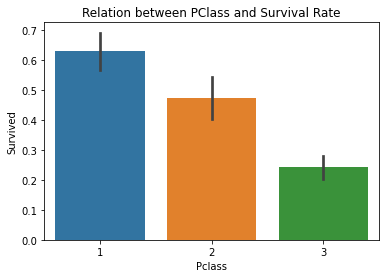

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plt.figure(figsize=(12,6))
sns.barplot(x=X_full.Pclass,y=y_full)
plt.title("Relation between PClass and Survival Rate")
plt.show()

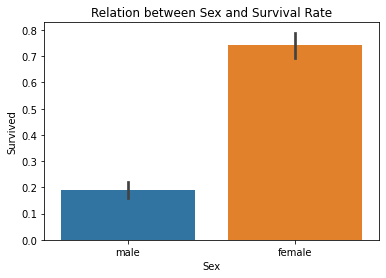

In [15]:
# plt.figure(figsize=(12,6))
sns.barplot(x=X_full.Sex,y=y_full)
plt.title("Relation between Sex and Survival Rate")
plt.show()

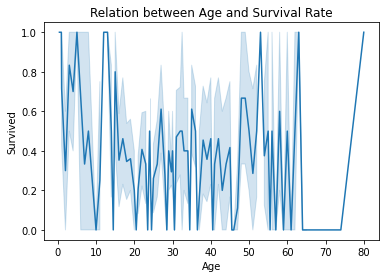

In [16]:
# plt.figure(figsize=(12,6))
plt.title("Relation between Age and Survival Rate")
sns.lineplot(x=X_full.Age,y=y_full)
plt.show()

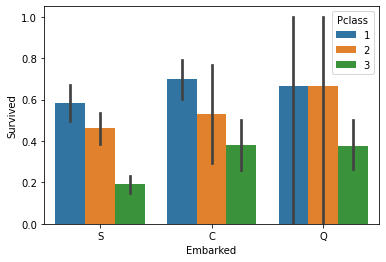

In [17]:
# plt.figure(figsize=(12,6))
sns.barplot(x=X_full.Embarked,y=y_full,hue=X_full.Pclass)
plt.show()

In [18]:
# X_full.head()

Transforming Categorical Values

In [19]:
sex = pd.get_dummies(X_full['Sex'])
X_full = X_full.join(sex)



In [20]:
embarked = pd.get_dummies(X_full['Embarked'])
X_full = X_full.join(embarked)

X_full = X_full.drop(columns=['Sex','Embarked'])
X_full.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [21]:
X_full.shape

(891, 11)

# Model Selection 

In [22]:
# Splitting training and validation data

from sklearn.model_selection import train_test_split
X_train,X_val, y_train , y_val = train_test_split(X_full,y_full,random_state = 1)

In [23]:
y_train

35     0
46     0
453    1
291    1
748    0
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 668, dtype: int64

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1,solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [25]:
y_pred = clf.predict(X_val)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val,y_pred)

0.7937219730941704

# Support Vector Machine 

In [27]:
from sklearn import svm

clf = svm.SVC(kernel='linear',class_weight='balanced')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)
accuracy_score(y_val,y_pred)

0.7982062780269058

# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini',random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)
# clf.score(y_val,y_pred)
clf.score(X_val,y_val)
# accuracy_score(y_pred,y_val)

0.7488789237668162

# Random Forest 

In [37]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, n_jobs=3, random_state=1,class_weight='balanced')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)
accuracy_score(y_val,y_pred)

0.7982062780269058

In [41]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Bagging Ensemble

In [39]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5,max_features=1.0,n_estimators=20)
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=20)

In [40]:
bg.score(X_val,y_val)

0.7847533632286996

In [47]:
bg.score(X_train,y_train)

0.9446107784431138

## Boosting AdaBoost

In [44]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5,learning_rate=1)
adb.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=5)

In [53]:
adb.score(X_val,y_val)
# adb.score(X_train,y_train)

0.726457399103139

## Own Ensemble Model

In [50]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(random_state=1,solver='liblinear')
ssvm = svm.SVC(kernel='linear',class_weight='balanced',degree=2)
dt = DecisionTreeClassifier(criterion='gini',random_state=1)

evc = VotingClassifier( estimators = [('lr',lr), ('ssvm',ssvm), ('dt',dt)], voting = 'hard')


In [51]:
evc.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=1,
                                                 solver='liblinear')),
                             ('ssvm',
                              SVC(class_weight='balanced', degree=2,
                                  kernel='linear')),
                             ('dt', DecisionTreeClassifier(random_state=1))])

In [52]:
evc.score(X_val,y_val)

0.8071748878923767